In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline
import numpy as np
import duckietown_code_utils as dcu;
import cv2;
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt

INFO:geometry:version: 2.0.5


Populating the interactive namespace from numpy and matplotlib


DEBUG:commons:version: 6.1.7 *
INFO:typing:version: 6.1.8
INFO:conf_tools:conf_tools 6.0.2


Populating the interactive namespace from numpy and matplotlib


# Image filtering

Now we want to do some basic filtering of the images.

In particular, let's say we want to avoid hitting duckies.

We then need to highlight our duckies in the image.

Let's load a test image.

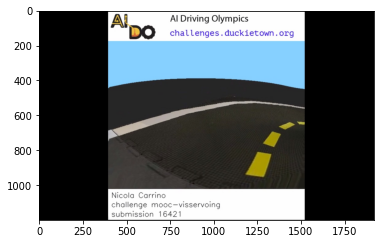

In [2]:
#fn = '../samples/big-duck/big-duck-17.jpg' # experiment with different images!
#fn = '../samples/many-duckies/prova.jpg'
# fn = '../samples/many-duckies/prova2.jpg'
fn = '../samples/visual-lane/ev1.jpg'

image = dcu.rgb_from_jpg_fn(fn)
imshow(image);

Let's now convert it to [HSV color space](https://en.wikipedia.org/wiki/HSL_and_HSV) so that it is easier to filter by colors.


In [3]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
hsv.shape

(1200, 1920, 3)

Hue: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Saturation: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Value: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


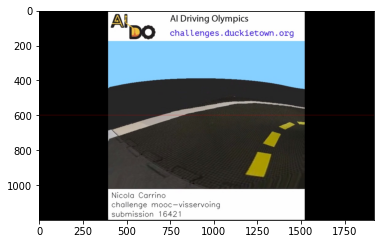

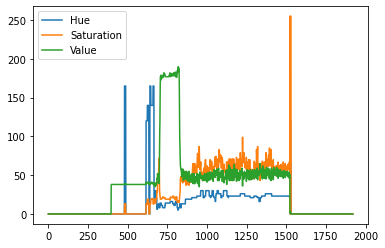

In [4]:
a,b,c,d = 600,601,0,hsv.shape[1]
image_copy = image.copy()
image_copy[a:b,c:d] = (255,0,0)
imshow(image_copy);

tmp = hsv[a:b,c:d]
print("Hue:",tmp[0,:50,0])
print("Saturation:",tmp[0,:50,1])
print("Value:",tmp[0,:50,2])
fig = figure()
plt.plot(list(range(d-c)),tmp[0,:,0], label = "Hue")
plt.plot(list(range(d-c)),tmp[0,:,1], label = "Saturation")
plt.plot(list(range(d-c)),tmp[0,:,2], label = "Value")
plt.legend()
plt.show()

In [5]:
lower_hsv = np.array([5, 110, 110])
upper_hsv = np.array([30, 255, 255])

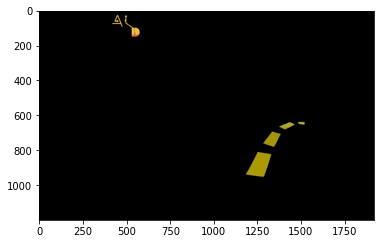

In [6]:
# Returns a matrix of 0 or 1 that satisfy the constraint
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# Get a "masked image"
masked = cv2.bitwise_and(image, image, mask=mask)
imshow(masked);

The bounds we put by default highlight the beak. But we want the yellow of the duckie!